In [1]:
import numpy as np
import numpy.ma as ma
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat = np.genfromtxt('2016-04-26_calibration_mod.txt')

In [3]:
currents = np.array([0.1, 1.0, 2.0, 3.0])
values = np.array([])
for i in currents:
    mask=[a != i for a in dat[:,0]]
    mx = ma.masked_array(dat[:,1], mask)
    values = np.append(values, int(mx.mean()))

In [4]:
slope, intercept, r_value, p_value, std_err = stats.linregress(currents, values)

In [5]:
line = slope * currents + intercept

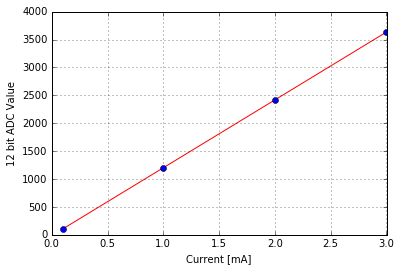

In [6]:
plt.plot(currents, line, 'r-', currents,values,'o')
plt.xlabel('Current [mA]')
plt.ylabel('12 bit ADC Value')
plt.grid(1)

In [7]:
slope

1216.5958576739247

In [8]:
intercept

-15.558682952735126